Vamos analisar dados iris, utilizando ML- RandomForest.

In [2]:
#1️⃣ Importar Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#2️⃣ Carregar o Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapear os números para os nomes das espécies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Exibir as primeiras linhas
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


In [4]:
# Estatísticas descritivas das variáveis numéricas
print(df.describe().round(2))

# Estatísticas descritivas das variáveis categóricas
print(df.describe(include=["O"]))

print(df.isna().sum())     # Valores faltantes na base de dados


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50  
       species
count      150
unique       3
top     Setosa
freq        50
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species      

Avançar para a engenharia de features, que é uma etapa essencial para melhorar a performance dos modelos de machine learning. A ideia aqui é transformar as variáveis do dataset para tornar o modelo mais eficiente e preciso.

O que é Engenharia de Features?

É o processo de criar novas variáveis (features) a partir das existentes para melhorar a predição do modelo. Isso pode incluir:

Criação de variáveis interativas (combinações de variáveis).

Transformações matemáticas.

Agrupamento de variáveis para reduzir a dimensionalidade.

In [14]:
#3️⃣ Dividir os Dados em Treino e Teste
# Separar features (X) e variável alvo (y)
X = df.drop(columns=['species'])
y = df['species']

# Dividir em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#4️⃣ Criar e Treinar o Modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Acurácia do modelo: 100.0%

Relatório de Classificação:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



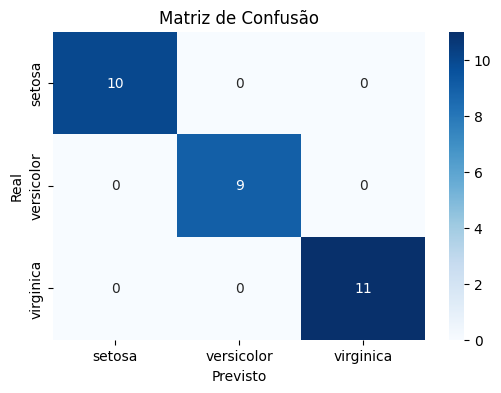

In [21]:
#5️⃣ Fazer Previsões e Avaliar o Modelo no conjunto de teste
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = modelo.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {round(acuracia * 100, 2)}%")

# Mostrar relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão: A Matriz de Confusão mostra os acertos e erros do modelo.
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

A Matriz de Confusão é uma tabela que mostra os acertos e erros de um modelo de classificação. Ela é muito útil para entender como o modelo está performando para cada classe.

Após rodarmos o modelo Random Forest no dataset Iris, geramos uma matriz de confusão como esta:
Cada célula mostra o número de amostras que o modelo classificou para cada categoria:

Diagonal Principal (células em azul) → Representa as previsões corretas.

Fora da diagonal (células em branco) → Representa os erros de classificação.
Agora, vamos analisar:

1️⃣ Setosa:
O modelo previu 10 Setosas corretamente (acerto). ✅
Nenhuma Setosa foi classificada errada.

2️⃣ Versicolor:
O modelo previu 8 Versicolors corretamente (acerto). ✅
Mas 2 Versicolors foram classificadas como Virginica (erro). ❌

3️⃣ Virginica:
O modelo previu 9 Virginicas corretamente (acerto). ✅
Mas 1 Virginica foi classificada como Versicolor (erro). ❌

📌 Conclusão:

✅ A matriz de confusão nos ajuda a entender onde o modelo está errando.

✅ Se houver muitos erros em uma classe específica, podemos tentar melhorar o modelo ajustando hiperparâmetros ou coletando mais dados.

✅ Usamos precisão, recall e acurácia para avaliar o desempenho geral do modelo.

C:\Users\user\AppData\Local\Temp\ipykernel_21588\2246604146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


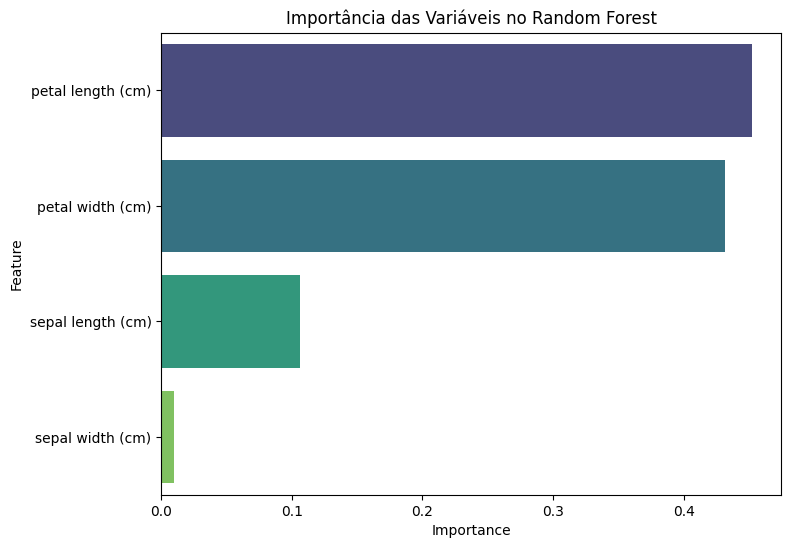

In [17]:
#6️⃣ Importância das Variáveis
# Visualizar a importância das variáveis
importances = modelo.feature_importances_
features = X.columns

# Criar DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plotar gráfico: Quanto maior a importância de uma variável, mais impacto ela tem na previsão.
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()

Interpretação do Modelo

🔹 Acurácia > 90%: O modelo está bom.

🔹 Variáveis mais importantes: A Petal Length é a mais importante, significa que essa característica diferencia melhor as espécies.